# (Ford gobike Data Analysis)
## by (Dina Gamal Mohamed)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
#Ford gobike Data Analysis# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('data.csv')

In [3]:
# overview of dataset
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# overview the number of the missing values
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
 #Drop missing values 
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [8]:
#number of duplicated values
sum(df.duplicated())

0

# Data Cleaning

In [9]:
# convert the start and the ending time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
#convert the age to intervels
def Age_intervals(row):
    if 1878 <= row <= 1956:
        return "Seniors"
    elif 1956 <= row <= 1970:
        return "Adult"
    elif 1971 <= row <= 1990:
        return "Mid-age"
    elif row > 1991:
        return "youth"

In [11]:
df['member_birth_year']=df['member_birth_year'].apply(Age_intervals)

In [12]:
df['member_birth_year'].value_counts()

Mid-age    100435
youth       48176
Adult       15651
Seniors      2206
Name: member_birth_year, dtype: int64

In [13]:
df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [14]:
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [15]:
# drop the unimportantcolumns
df.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude', 'bike_id'], axis=1, inplace=True)

### What is the structure of your dataset?

> There are 174952 row in the bike-sharing system covering the greater San Francisco Bay area with 16 features (duration_sec-start_time-end_time- start_station_id-start_station_name-start_station_latitude-start_station_longitude-end_station_id-end_station_name -end_station_latitude-end_station_longitude-bike_id-user_type-member_birth_year-member_gender- bike_share_for_all_trip )

### What is/are the main feature(s) of interest in your dataset?

> I think that the most important features is the start and the end time to know what is the time of day that we need to increase the number of the bike in , user_type and gender they also play an important role in our data

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the start and the end time will play an important role

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
base_color=sb.color_palette()[0]

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

# What is the distipution of the main feature(s) of interest in your dataset ?

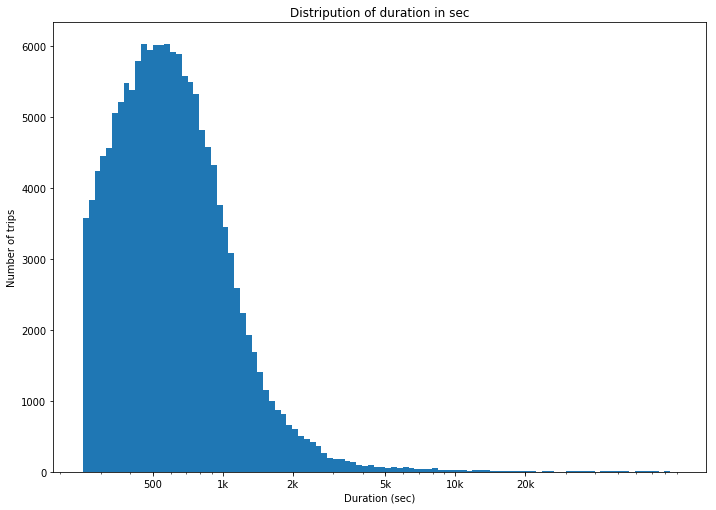

In [17]:
# Distribution of Trip Durations
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')
plt.title("Distripution of duration in sec")
plt.show()

Duration sec in the dataset take on a very large range of values, from about 61 sec at the lowest, to about 85444 sec at the highest. Plotted on a logarithmic scale

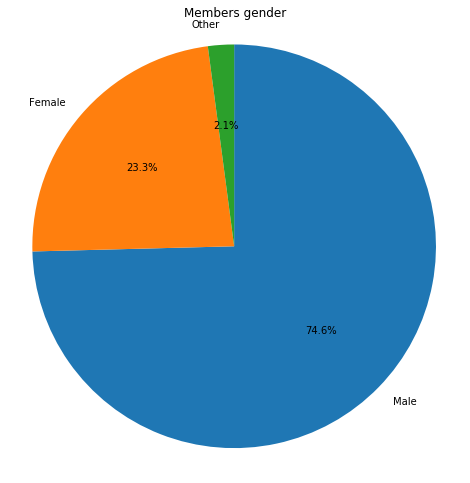

In [18]:
# the proportion of male and female
plt.figure(figsize=[ 11.69, 8.27])
gender_count=df['member_gender'].value_counts() 
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=90,counterclock=False);
plt.title("Members gender")
plt.axis('square')
plt.show()

As we can see the males is 3 time of the females members

Text(0.5,1,'User Type')

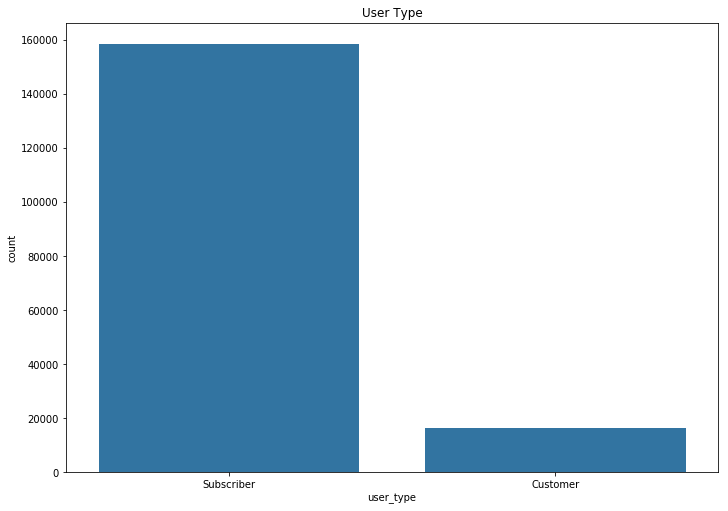

In [19]:
# the users typies
plt.figure(figsize=[ 11.69, 8.27])
order=df['user_type'].value_counts().index
sb.countplot(data=df,x='user_type',color=base_color,order=order);
plt.title("User Type")

The Member type consists of only types customer which takes a very small precentage in our data about 9.4% and subcriber which occupies the hole data with 91%

Text(0.5,1,'Member Ages')

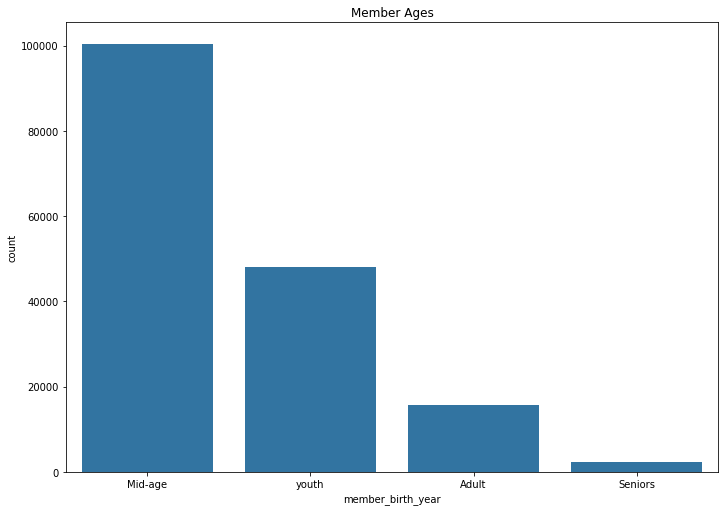

In [20]:
# Member ages distribution
plt.figure(figsize=[ 11.69, 8.27])
order=df['member_birth_year'].value_counts().index
sb.countplot(data=df,x='member_birth_year',color=base_color,order=order);
plt.title("Member Ages")

We classifiy our member birthday into 4 categories seniors which ages is larger than 80 years and Adult thier ages between 79 and 51 years old and the third one is Mid-age which occupies the most of the data thier ages between 50-31 and the last one is the youth whose ages is less than 31

# In which weekday is highest number of trips?

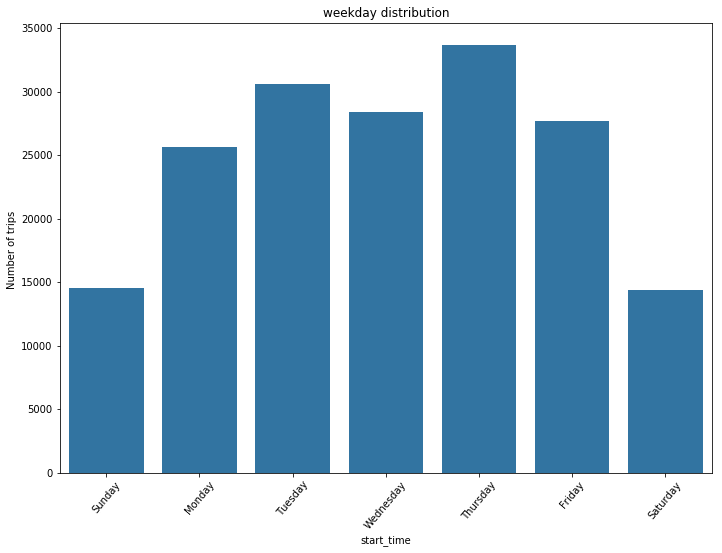

In [21]:
# The frequancy of using bike in the weekday
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data=df,x=df['start_time'].dt.day_name(),color=base_color,order=weekday);
plt.title("weekday distribution")
plt.ylabel("Number of trips ")
plt.xticks(rotation=50);

In this section we want to study the most busy day in the week and we find that it is thursday which seem logic as it is the weekend

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec feature took on a large range of values, so I looked at the data using a log transform. Under the transformation , we found that thursday is the most busy day and that makes sense as the thursday is the weekend, and the members who used to ride bike their ages between 50-31 years

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes the member birthday was very large so we convert this column to 4 categories to be more readable in visualization

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# What is relation between gender and bike trip duration?

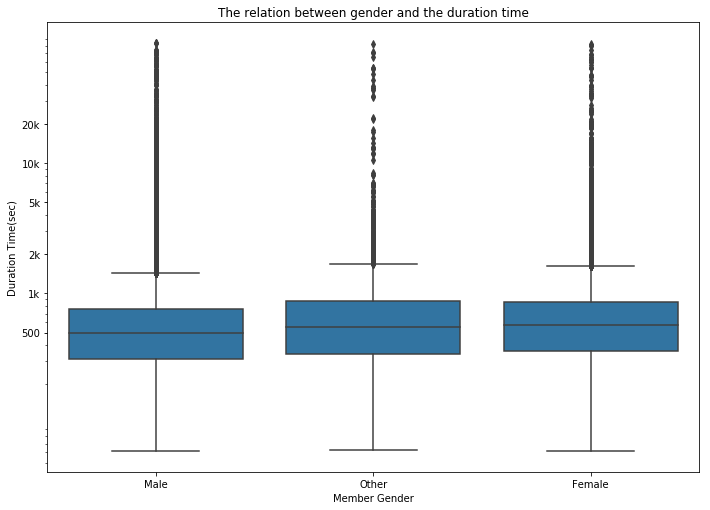

In [22]:
# relation between gender and start time
plt.figure(figsize=[ 11.69, 8.27])
sb.boxplot(data=df,x='member_gender',y='duration_sec',color=base_color);
plt.xlabel("Member Gender")
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel("Duration Time(sec)")
plt.title("The relation between gender and the duration time")
plt.show()

we can see that females spend more time in the trip than the males

# What is relation between Member Age and bike trip duration?

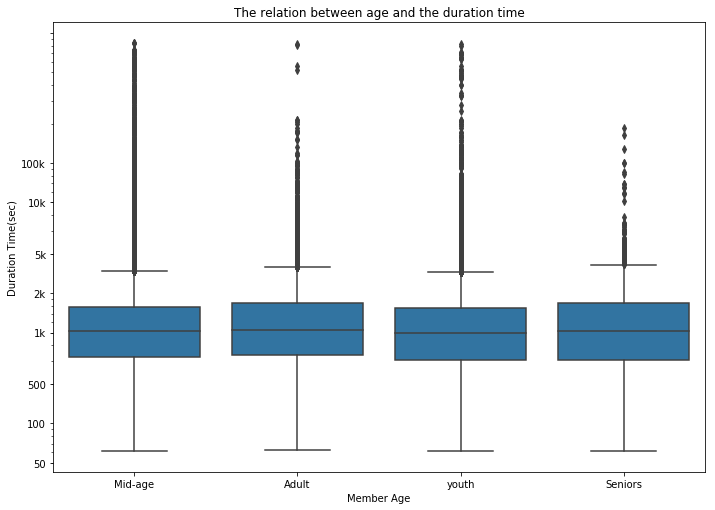

In [23]:
# relation between age and duration time
plt.figure(figsize=[ 11.69, 8.27])
sb.boxplot(data=df,x='member_birth_year',y='duration_sec',color=base_color);
plt.xlabel("Member Age")
plt.yscale('log')
plt.yticks([50, 100, 200, 500, 1e3, 2e3,5e3,1e4,1e5], [50,100, 500, '1k', '2k', '5k','10k','100k'])
plt.ylabel("Duration Time(sec)")
plt.title("The relation between age and the duration time")
plt.show()

We can see that the mid age member whose ages between 50-31 spend more time in the bike trip and the seniorswhose ages more than 80 years spend the least time

# What is relation between Member Age and Member type?

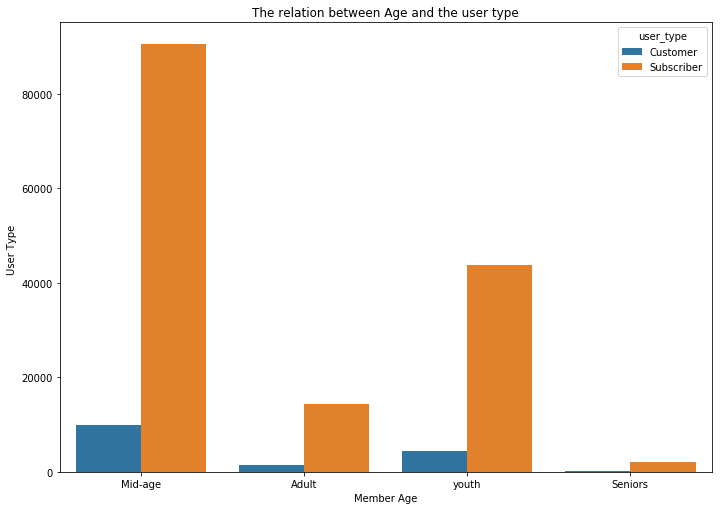

In [24]:
# relation between age and user type
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=df,x='member_birth_year',hue='user_type');
plt.xlabel("Member Age")
plt.ylabel("User Type ")

plt.title("The relation between Age and the user type")
plt.show()

The senior members nearly are not use the customer type  

# What is relation between Member gender and bike share?

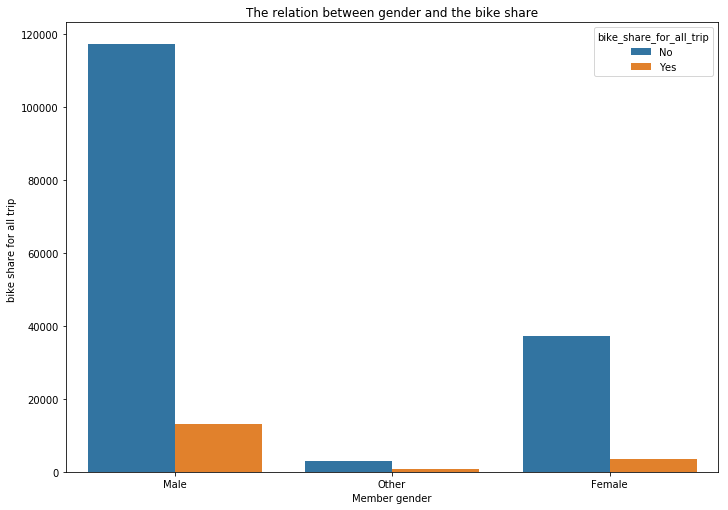

In [25]:
# relation between gender and bike share for all trip
plt.figure(figsize=[ 11.69, 8.27])
ax=sb.countplot(data=df,x='member_gender',hue='bike_share_for_all_trip');
plt.xlabel("Member gender")
plt.ylabel("bike share for all trip ")
plt.title("The relation between gender and the bike share")
plt.show()

Females member seems not to share thier bikes 

# What is relation between Member type and weekdays?

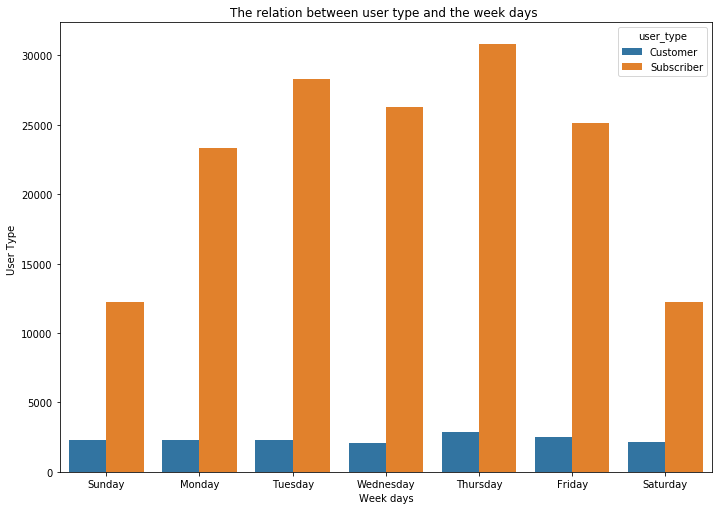

In [26]:
# relation between user type and start time in all weekdays
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax=sb.countplot(data=df,x=df['start_time'].dt.day_name(),hue='user_type',order=weekday);
plt.xlabel("Week days")
plt.ylabel("User Type ")
plt.title("The relation between user type and the week days ")
plt.show()

The customer type increase in the thursday that is the week end

# What is relation between Member age and weekdays?

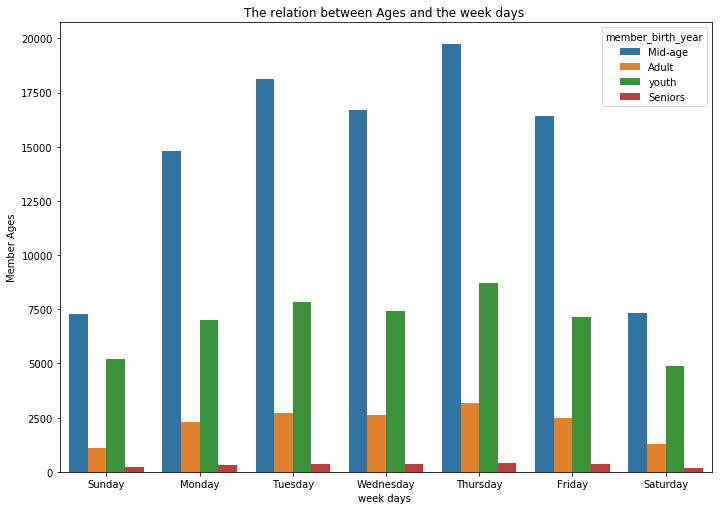

In [27]:
# relation between user type and start time in all weekdays
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax=sb.countplot(data=df,x=df['start_time'].dt.day_name(),hue='member_birth_year',order=weekday);
plt.ylabel("Member Ages")
plt.xlabel("week days ")
plt.title("The relation between Ages and the week days ")
plt.show()

The seniors member seem to be using the same period every day

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Males used bike more than female its about 3 times than females and we could say that female spend more duration sec than males, the number of the subscriber is very high than the customer and the number of customer is become highest in the weekend and the customer type commonly use by the pepole whose age between 50-31 years,The peoples whose age is more than 80 years is the same in every week days

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The number of the subscriber is very high than the customer and the number of customer is become highest in the weekend,Males used bike more than female its about 3 times than females

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

# What is relation between Member gender and weekdays and duration time trip?

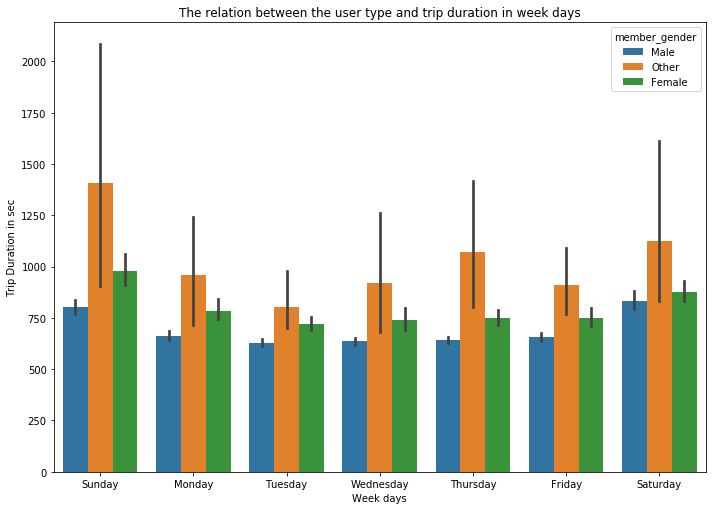

In [33]:
#Overview the relation between the gender and the duration time in the week days
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.barplot(data=df, x=df['start_time'].dt.day_name(), y=df['duration_sec'], hue='member_gender',order=weekday);
plt.title("The relation between the user type and trip duration in week days")
plt.xlabel('Week days');
plt.ylabel('Trip Duration in sec');

AS we see the females spend more time than males especially on wednesday

# What is relation between Member age and member gender and duration time trip?

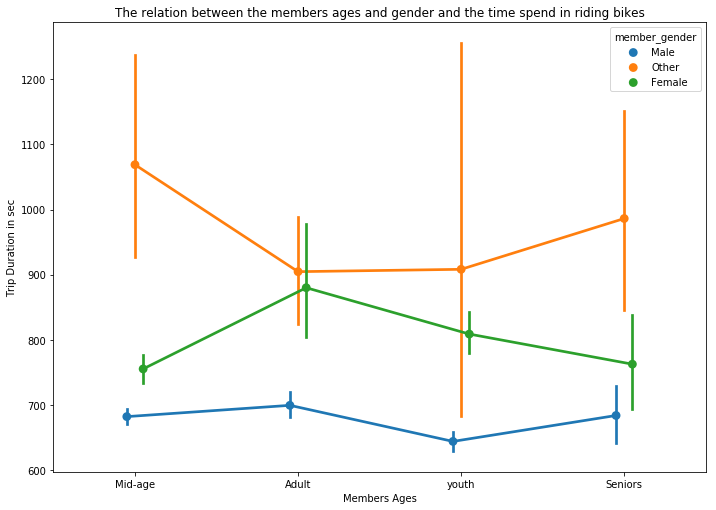

In [29]:
#The relation between the members ages and gender and the time spend in riding bikes
plt.figure(figsize=[ 11.69, 8.27])
sb.pointplot(data=df, x='member_birth_year', y=df['duration_sec'], hue='member_gender',dodge = 0.1);
plt.title('The relation between the members ages and gender and the time spend in riding bikes')
plt.xlabel('Members Ages');
plt.ylabel('Trip Duration in sec');

As we see the female adult members spend the highest time 

# What is relation between Member type and member gender and weekdays and duration time trip?

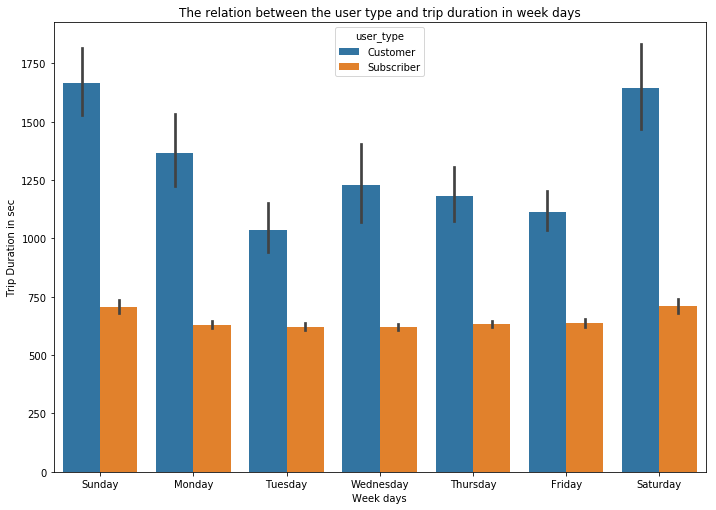

In [30]:
#The relation between the user type and trip duration in week days
plt.figure(figsize=[ 11.69, 8.27])
weekday = ['Sunday','Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.barplot(data=df, x=df['start_time'].dt.day_name(), y=df['duration_sec'], hue='user_type',order=weekday);
plt.title("The relation between the user type and trip duration in week days")
plt.xlabel('Week days');
plt.ylabel('Trip Duration in sec');

At general the customer type spend more time than the subscriber especially on Saturday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> At the end of our trip the multivariate exploration is much more powerful than the previous two types. The customer type spend more time than subscriber type in the week day sespecially on friday, Adult females spend more time than males,males spend more time on saturday

### Were there any interesting or surprising interactions between features?

> The members whose ages is more than 80 is interesting in riding bikes, The difference between the males and females members is very high

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!